<a href="https://colab.research.google.com/github/Wpompeo/Wpompeo_DataScience/blob/master/ProjetoSistemasRecomenda%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Neste notebook, temos algumas informações do arquivo que irei utilizar para o projeto da disciplina de **Sistemas de Recomendação** do curso de [*Big Data e Inteligência Analítica*](https://www.uniritter.edu.br/graduacao/big-data-e-inteligencia-analitica-2/).

---
#### O tema abordado, será o suicídio no Brasil, um tema delicado que vem sendo tratado cada vez mais em campanhas do *Setembro Amarelo*.

<center>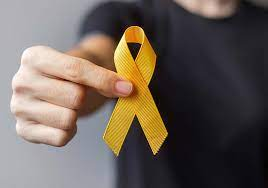</center>


## Descrição dos dados utilizados sobre o suicídio.

O conjunto de dados que irei utilizar, está disponível nesta [página](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016). O arquivo foi baixado para o meu repositório do *github*, local de onde vamos carrega-lo para iniciar nossa análise.

# Importando Dados:

In [2]:
# Importar pacotes de bibliotecas necessários.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Importando os dados sobre o suicídio para um DataFrame.

df = pd.read_csv("https://raw.githubusercontent.com/Wpompeo/Wpompeo_DataScience/master/SuicideMundial.csv")

In [4]:
# Conhecendo nosso DataFrame
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
# Verificar o tamanho do DataFrame

print("Variáveis: ", df.shape[1])
print("Entradas: ", df.shape[0])

Variáveis:  12
Entradas:  27820


 O Dataframe carregado é composto de 12 colunas e 27820 entradas.

In [6]:
# Conhecendo as colunas do Dataframe
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

### Dicionário de variáveis:

* **country:** país onde os dados foram registrados
  * 101 países
* **year:** ano em que os dados foram registrados
  * 1987 a 2016
* **sex:** sexo considerado no registro
  * *male* - masculino
  * *female* - feminino
* **age**: faixa etária considerada
  * 5-14 anos
  * 15-24 anos
  * 25-34 anos
  * 35-54 anos
  * 55-74 anos
  * 75+ anos
* **suicides_no:** número de suicídios
* **population:** população para o grupo
* **suicides/100k pop:** número de suicídios por 100 mil habitantes
* **country_year:** identificador contendo `country` + `year`
* **HDI for year:** Índice de Desenvolvimento Humano (IDH) para o ano
* **gdp_for_year:** Produto Interno Bruto (PIB) para o ano
* **gdp_per_capita:** Produto Interno Bruto (PIB) per capita
* **generation:** Gerador dos dados

### Como o objetivo do trabalho é analisar somente os dados referentes ao **Brasil**, irei criar um novo DataFrame somente com os dados do Brasil.

In [7]:
# Gerar Dataframe com os dados referentes ao Brasil.

df_brasil = df[df.country == "Brazil"].copy()

In [8]:
# Verificando o formato do nosso novo Dataframe

print("Formato do df_brasil: ", df_brasil.shape)
print("Variáveis: ", df_brasil.shape[1])
print("Entradas: ", df_brasil.shape[0])


Formato do df_brasil:  (372, 12)
Variáveis:  12
Entradas:  372


In [9]:
# Conhecendo o novo Dataframe

df_brasil.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X
